In [208]:

!pip install plotly-express
!pip install nbformat==4.2.0
!pip install plotly
!pip install bubbly

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


  Using cached nbformat-4.2.0-py2.py3-none-any.whl (153 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.0.7
    Uninstalling nbformat-5.0.7:


ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'c:\\programdata\\anaconda3\\lib\\site-packages\\nbformat-5.0.7.dist-info\\COPYING.md'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [209]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
from tqdm import tqdm
init_notebook_mode(connected=True)
%config InlineBackend.figure_format = 'svg'

Each project starts with statements of the purpose (goal), objectives, and the research hypotheses. 

The topic of our mini-research project will be **' The comparative analysis of the countries on the index of happiness'**.
The  **goal** - to compare key indicators reflecting the level of happiness of the population of different countries, and the dynamics of their change for 2015-2020. 

The **objectives**: 
* To gather the data for 2015-2020 on the happiness level indices. 
* To compare the descriptive statistics across the countries and time periods.
* To visualize the data in order to draw the additional conclusion for exploratory data analysis.
* To test the statistical hypotheses on differences between most distinct continents based on selected indicators. 

**Research hypothesis**: There is no significant difference in the level of happiness across different countries on average. 

**Task 1.** EDA.Part 1

In a given data set we observe the reported statistics on the happiness index across different countries. It covers 5 years: 2015 - 2019 years. 

You can find additional descriptions on context and content here: https://www.kaggle.com/unsdsn/world-happiness

Read file ```happiness_index.csv``` into a DataFrame using pandas. The columns:

* ```Country``` - Name of the country.

* ```Happiness Rank``` - Rank of the country based on the Happiness Score.

* ```Happiness Score``` - A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

* ```GDP``` - The extent to which GDP per capita contributes to the calculation of the Happiness Score.

* ```Life expectancy``` - The extent to which Life expectancy contributed to the calculation of the Happiness Score.

* ```Freedom``` - The extent to which Freedom contributed to the calculation of the Happiness Score.

* ```Trust``` - The extent to which Perception of Government Corruption contributes to Happiness Score.

1.  As far as not each country was recorded each year, you need to filter this table and leave only countries without missing recording for each year (2015, 2016, 2017, 2018, 2019).  *Hint*: you need to check first how many recordings there are for each country in a data set. For instance, think about how you can use the result of ```value_counts()``` and ```isin``` to write a condition for filtering. 

Write a conclusion about how many countries there were, how many of them you excluded from the analysis, and why.
Next tasks you need to complete with a filtered data set.

2. If you look at the table, you will notice that it is sorted by year and then by happiness rank. It would be easier to view all the records for each country and year at once so that you can track the evolution of the index over time. Sort this table by both country name and year. If you observe, after applying the ```.head(15)``` method, the beginning of the dataset with Afghanistan, Albania and Algeria for 2015-2019, that is correct.

In [210]:
data = pd.read_csv('happiness_index.csv')

In [211]:
len(data['Country'].unique())

170

In [212]:
data.groupby('Country')['Year'].count().value_counts()

5    141
4     12
1      9
3      4
2      4
Name: Year, dtype: int64

In [213]:
countries_not_five = {}
for country in data['Country']:
    if country not in countries_not_five:
        countries_not_five[country] = 1
    else:
        if countries_not_five[country] < 5:
            countries_not_five[country] += 1
for key, value in countries_not_five.items():
    if value != 5:
        data = data.drop(data[data["Country"] == key].index)
len(data['Country'].unique())

141

In [214]:
data.groupby('Country')['Year'].count().value_counts()

5    141
Name: Year, dtype: int64

In [215]:
len(data['Country'].unique())

141

Было 163 страны, удалил 8 стран.

In [216]:
# Task 2
data = data.sort_values(['Country', 'Year'])
data.head(15)

Country  Happiness Rank  Happiness Score  Year       GDP  \
152  Afghanistan             153            3.575  2015  0.319820   
311  Afghanistan             154            3.360  2016  0.382270   
455  Afghanistan             141            3.794  2017  0.401477   
614  Afghanistan             145            3.632  2018  0.332000   
779  Afghanistan             154            3.203  2019  0.350000   
94       Albania              95            4.959  2015  0.878670   
266      Albania             109            4.655  2016  0.955300   
423      Albania             109            4.644  2017  0.996193   
581      Albania             112            4.586  2018  0.916000   
732      Albania             107            4.719  2019  0.947000   
67       Algeria              68            5.605  2015  0.939290   
195      Algeria              38            6.355  2016  1.052660   
367      Algeria              53            5.872  2017  1.091864   
553      Algeria              84            5.295  2018  0.979000   
713      Algeria              88            5.211  2019  1.002000   

     Life Expectancy   Freedom     Trust  
152         0.303350  0.234140  0.097190  
311         0.173440  0.164300  0.071120  
455         0.180747  0.106180  0.061158  
614         0.255000  0.085000  0.036000  
779         0.361000  0.000000  0.025000  
94          0.813250  0.357330  0.064130  
266         0.730070  0.318660  0.053010  
423         0.731160  0.381499  0.039864  
581         0.790000  0.419000  0.032000  
732         0.874000  0.383000  0.027000  
67          0.617660  0.285790  0.173830  
195         0.618040  0.210060  0.161570  
367         0.617585  0.233336  0.146096  
553         0.687000  0.077000  0.135000  
713         0.785000  0.086000  0.114000

The below code calculates the difference between 2015 and 2019 happiness scores for each country.
Sort the dictionary by score difference (instead of sorting by country name) and select the 2 countries with the largest positive difference and the 2 countries with the largest negative score difference. Add these 4 countries and Russia to the ``` sample ``` variable - these countries will be our subset for further analysis.

Note, that this code will not work until you filter your data set and leave only the countries with the recordings for each out of 5 years. 

In [217]:
stata_dict = {}
for country in tqdm(data.Country.unique()): 
    stata = data[data.Country == country]['Happiness Score']
    diff_2019_2015 = stata.iloc[4] - stata.iloc[0]
    stata_dict[country] = diff_2019_2015
for i in sorted(stata_dict.items(), key=lambda x: x[1]):
    print (i[0], i[1])

100%|██████████████████████████████████████████████████████████████████████████████| 141/141 [00:00<00:00, 2657.89it/s]

Venezuela -2.1029999999999998
Zambia -1.0219999999999994
Zimbabwe -0.9470000000000005
Haiti -0.9209999999999998
Malawi -0.8819999999999997
Botswana -0.8439999999999999
Yemen -0.6970000000000001
Brazil -0.6829999999999998
Liberia -0.5960000000000014
Mexico -0.5920000000000005
India -0.5500000000000007
Tanzania -0.5499999999999998
Singapore -0.5359999999999987
Belarus -0.4899999999999993
Argentina -0.48799999999999955
Panama -0.46499999999999897
Thailand -0.44700000000000095
Malaysia -0.43099999999999916
Algeria -0.39400000000000013
Afghanistan -0.3719999999999999
Moldova -0.35999999999999854
Colombia -0.3520000000000003
Ukraine -0.3490000000000002
Croatia -0.32699999999999996
Turkmenistan -0.3009999999999984
Jordan -0.2859999999999987
Tunisia -0.2779999999999996
Kuwait -0.274
Albania -0.2400000000000011
Iraq -0.23999999999999932
Bangladesh -0.23799999999999955
Qatar -0.23700000000000188
Libya -0.2289999999999992
United States -0.22699999999999942
Chile -0.22599999999999998
Ethiopia -0.2

In [218]:
sample = ['Russia', 'Venezuela', 'Zambia', 'Benin', 'Ivory Coast']

Plot the pivot table with a code below and draw a conclusion on the differences among these countries in GDP per capita.

In [219]:
data[data.Country.isin(sample)].pivot_table(columns='Country', index='Year', values='GDP')

Country     Benin  Ivory Coast    Russia  Venezuela    Zambia
Year                                                         
2015     0.286650     0.465340  1.137640   1.044240  0.470380
2016     0.394990     0.555070  1.232280   1.133670  0.612020
2017     0.431085     0.603049  1.281778   1.128431  0.636407
2018     0.378000     0.541000  1.151000   0.996000  0.562000
2019     0.393000     0.569000  1.183000   0.960000  0.578000

Страны с более низким "уровнем счастья" имеют более высокий ВВП, чем страны, которые наиболее данный показатель имеет максимальные результаты

What year was the most economically successful for these countries in 2015-2019?

Экономически успешным годом был 2017

**Task 2.** EDA. Part 2: plots

Let's make some plots to visualize the data. Run the code below and interpret the graph.

In [220]:
df = data[data.Country.isin(sample)].groupby(['Year','Country'], as_index=False)['Happiness Score'].sum()
px.line(df, 
        title='The dynamics of Happiness Score',
        x='Year', 
        y='Happiness Score', 
        color='Country')

* What is the name of this type of graph?
* In which countries in your sample are there positive and negative trends? 
* What does this mean in terms of the happiness index? 
* [bonus 1 point] Recall or try to find out what events in these countries can positively affect the happiness index?

* Линейный
* В странах: Бенин, Кот-д'Ивуар - положительная тенденция, в странах: Венесуэлла и Замбия - отрицательная. Россия - не изменилось.
* Это значит, что с положительной тенденцией, условия жизни и "счастья" повышаются с каждым годом, а с отрицательной - наоборот, уменьшаются
* Венесуэлла - государственный переворот (2017), выборы призидента (2018), политический кризис (2019). Замбия - выспышка холеры (2017). Бенин - выборы призидента (2016), парламентские выборы (2019). Код д'иуар - выборы (2016). Россия - чемпионат мира по футболу (2018).

Take a look at histograms and scatter charts for key indicators across the entire dataset.

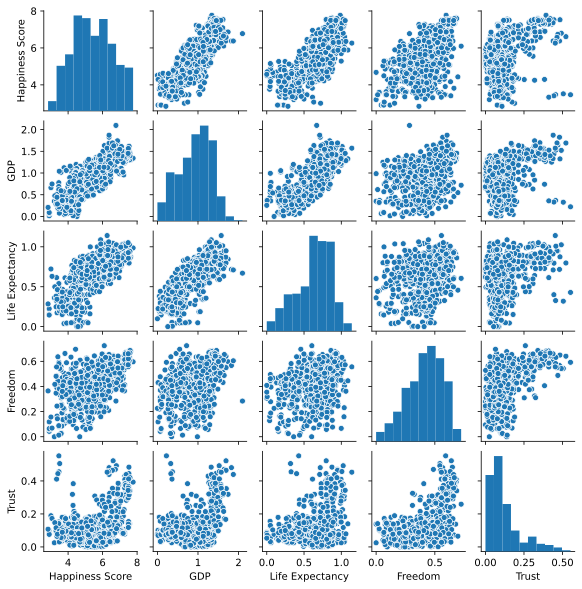

In [221]:
sns.pairplot(data[['Happiness Score', 
                  'GDP',
                  'Life Expectancy', 
                  'Freedom',
                  'Trust']], height=1.6);

* What kind of distributions are for each variable (or groups of variables)?
* Are there any linear trends in the interrelations between Happiness Score in a pair with other variables (according to the scatter plots)?

* Гистограммы и точечный график (объеденено с помощью парного графика)
* Да, с ВВП, с ожидаемой продолжительностью жизни наивысшая степень корреляции

Let's check your assumptions on linear trend and compute the correlation matrix. Run the code below. 

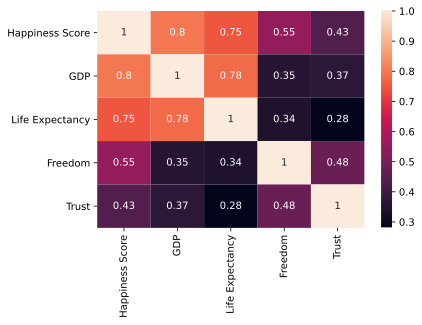

In [222]:
sns.heatmap(data[['Happiness Score', 
                  'GDP',
                  'Life Expectancy', 
                  'Freedom',
                  'Trust', 
                  'Country']].corr(), annot=True);

* Which variables are strongly correlated? Pick top 3 of them. 
* [bonus 1 point] Can you support by any evidence that exists there exists not only correlation, but causality between each of these 3 pairs of variables? 

* ВВП с оценкой счастья, ожидаемая продолжительность жизни с ВВП, ожидаемая продолжительность жизни с оценкой счастья
* Чем больше ВВП, тебе больше развита экономика в стране, те больше граждане получает зарплаты и находят куда потратить эти деньги, это очень влияет на счастья гражданина, проживающего в стране. ВВП влияет на ожидаемую продолжительность жизни, с таким посмылом, что чем больше ВВП, тем больше денег у государства и тем самым больше возможностей беречь здоровье своих жителей с помощью вложений в экологию и более экологичного выпуска товаров и услуг. Чем больше человек живет - тем больше счастлив он.

Look at the correlation matrix on the basis of your sample countries (run the code):

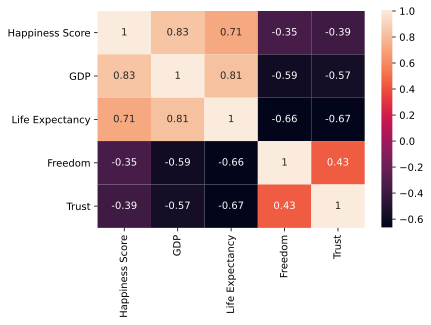

In [223]:
sns.heatmap(data[data.Country.isin(sample)][['Happiness Score', 
                                             'GDP',
                                             'Life Expectancy', 
                                             'Freedom',
                                             'Trust',  
                                             'Country']].corr(), annot=True);

* Compare the correlation matrices above. What values differ the most?
* Which matrix do you think is more reliable for inferring the general relationship between pairs of these variables? Why?
* Interpret the changes in the variables with the greatest negative correlation if the unit value changes by 1 unit.

* Всех больше различаются вера и ожидаемая продолжительность жизни
* Матрица, связанная с ВВП, так как она имеет самые большие корреляционные зависимости, а таакже основное влияние на все сферы деятельности человека
* Отрицательная корреляция — корреляция, при которой увеличение одной переменной связано с уменьшением другой 

Let's make a new variable ```Happiness Level```, which will include the level of happiness: low, medium or high. 

In [224]:
data['Happiness Level'] = pd.cut(data['Happiness Score'], 3, labels=["low", "medium", "high"])

Interpret the plot below in your own words:

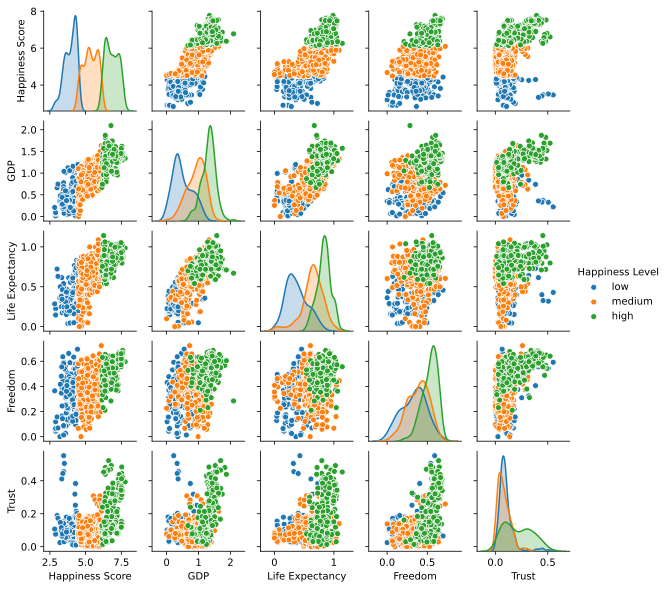

In [225]:
sns.pairplot(data[['Happiness Score', 
                  'GDP',
                  'Life Expectancy', 
                  'Freedom',
                  'Trust', 
                  'Happiness Level']], 
             height=1.6, 
             hue="Happiness Level");

В большинстве своем разделение уровней закономерно - тем выше, тем больый уровень счастья находится здесь. Но в таких переменных, как ожидаемая продолжительность жизни, восприятие коррупции и свобода, уровень счастья не зависит от коэффициентов, которые указаны в данном столбце

Let's use an additional dataset of population size for each year and country and look at the dynamics of change. 

In [226]:
from bubbly.bubbly import bubbleplot 

gapminder = pd.read_csv('gapminder.tsv', delimiter='\t')

figure = bubbleplot(dataset=gapminder, 
                    x_column='gdpPercap', 
                    y_column='lifeExp', 
                    bubble_column='country', 
                    time_column='year', 
                    size_column='pop', #population
                    color_column='continent', 
                    x_title="GDP per Capita", 
                    y_title="Life Expectancy", 
                    title='Gapminder Global Indicators',
                    x_logscale=True, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

Please, interpret the results and what kind of conclusions you can add into your analysis. 

С ростом ВВП, растет ожидаемый уровень жизни, а также популяция населения.

Run the code:

In [227]:
fig = make_subplots(rows=1, cols=1, specs=[[{'type':'domain'}]])
continents_population = dict(gapminder[gapminder.year == 2007].groupby('continent')['pop'].agg('sum'))
labels = [x for x in continents_population]

fig.add_trace(go.Pie(labels=labels, pull=[0, 0, 0, 0, 0.1], 
                     values=[value for key, value in continents_population.items()], 
                     name="Ratio"), 1, 1)
fig.update_layout(
    title_text="Ratio of population across differentcontinents",
    colorway=['rgb(69, 135, 24)', 'rgb(136, 204, 41)', 'rgb(204, 204, 41)', 
              'rgb(235, 210, 26)', 'rgb(209, 156, 42)'])
fig.show()

* What is the kind of this graph?
* What are the ratios for the continents?

* Круговая диаграмма
* Всех больше популяция населения в Азии, на втором месте Африка, на третьем Америка. Предпоследнее место занимаем Европа и Океания - минимальное значение популяции.

Change the title and the labels of x and y-axes on this plot correctly: 

In [228]:
figure = bubbleplot(dataset=data, 
                    x_column='Happiness Score', 
                    y_column='GDP', 
                    bubble_column='Country', 
                    time_column='Year', 
                    color_column='Happiness Level', 
                    x_title="Happiness Score", 
                    y_title="GDP", 
                    title='Ratio of GDP and Happiness Score',
                    scale_bubble=1.5)

iplot(figure, config={'scrollzoom': True})

**Task 3.** Web parsing and scraping.

It is reasonable to note that we can search for up-to-date information for 2020 and supplement the data.

Follow the link and find a report for 2020 there: https://en.wikipedia.org/wiki/World_Happiness_Report 

In [229]:
import requests
from bs4 import BeautifulSoup

You already know this function from our Week 9 pratical class, but pay your attention to a new line:

```python3
df = pd.read_html(str(content))[0]
```

It converts our structured document tree with HTML tags into a DataFrame. 

On a provided Wiki page, find an HTML tag using Developer Tools, which is for the table with results on the 2020 year, and replace it instead of ```'HTML TAG HERE'```. 

In [230]:
def download_table_from_page():
    url = 'https://en.wikipedia.org/wiki/World_Happiness_Report'
    response = requests.get(url)
    tree = BeautifulSoup(response.content, 'html.parser')
    # find the first matching table for this pattern
    content = tree.find('table', {'class' : 'wikitable sortable'})
    # convert structured html doc into a DataFrame
    df = pd.read_html(str(content))[0]
    
    return df

download_table_from_page()

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.809           1.285   
1               2                   Denmark  7.646           1.327   
2               3               Switzerland  7.560           1.391   
3               4                   Iceland  7.504           1.327   
4               5                    Norway  7.488           1.424   
..            ...                       ...    ...             ...   
148           149  Central African Republic  3.476           0.041   
149           150                    Rwanda  3.312           0.343   
150           151                  Zimbabwe  3.299           0.426   
151           152               South Sudan  2.817           0.289   
152           153               Afghanistan  2.567           0.301   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.500                    0.961                         0.662   
1             1.503                    0.979                         0.665   
2             1.472                    1.041                         0.629   
3             1.548                    1.001                         0.662   
4             1.495                    1.008                         0.670   
..              ...                      ...                           ...   
148           0.000                    0.000                         0.293   
149           0.523                    0.572                         0.604   
150           1.048                    0.375                         0.377   
151           0.553                    0.209                         0.066   
152           0.356                    0.266                         0.000   

     Generosity  Perceptions of corruption  
0         0.160                      0.478  
1         0.243                      0.495  
2         0.269                      0.408  
3         0.362                      0.145  
4         0.288                      0.434  
..          ...                        ...  
148       0.254                      0.028  
149       0.236                      0.486  
150       0.151                      0.081  
151       0.210                      0.111  
152       0.135                      0.001  

[153 rows x 9 columns]

So, it will be nice to join the report on the 2020 year with the reports on 2015-2019 in order to have a full data set for your analysis.
However, there are at least three problems:
1) The names of the columns differ
2) The content of columns differs
3) Some needed columns are missing, for instance, with a year. 

We will do the tasks to cope with it. 

1. Compare the columns from the data set on 2020 and data on 2015-2019. Rename the selected columns in place in a data set 2020 to the way they named for data 2015-2019: Overall rank => Happiness Rank, Country or region => Country, Score => Happiness Score, etc. till the end. Note, that you should rename only the columns which are present in both tables and differ in names (for example, Social support should not be included in rename method, because Social support is present only in the report 2020). 

2. Create a column Year and fill it with 2020 values for each row. There are several possible ways how you can do it, try to find out the easiest one. 

3. The code is provided for this task. Concatenate two data sets. Drop the extra column Social support. 

4. Check the missing values. For the column, Happiness Level fill in the missing values according to the value of Happiness Score (see a method ```pd.cut()``` used above). 

In [231]:
data_2020 = download_table_from_page()

In [232]:
data_2020 = data_2020.rename(columns={'Overall rank': 'Happiness Rank', 'Country or region': 'Country',
                                      'Score': 'Happiness Score', 'Freedom to make life choices': 'Freedom',
                                      'Healthy life expectancy': 'Life Expectancy', 'GDP per capita': 'GDP', 
                                      'Perceptions of corruption': 'Trust'})
data_2020

Happiness Rank                   Country  Happiness Score    GDP  \
0                 1                   Finland            7.809  1.285   
1                 2                   Denmark            7.646  1.327   
2                 3               Switzerland            7.560  1.391   
3                 4                   Iceland            7.504  1.327   
4                 5                    Norway            7.488  1.424   
..              ...                       ...              ...    ...   
148             149  Central African Republic            3.476  0.041   
149             150                    Rwanda            3.312  0.343   
150             151                  Zimbabwe            3.299  0.426   
151             152               South Sudan            2.817  0.289   
152             153               Afghanistan            2.567  0.301   

     Social support  Life Expectancy  Freedom  Generosity  Trust  
0             1.500            0.961    0.662       0.160  0.478  
1             1.503            0.979    0.665       0.243  0.495  
2             1.472            1.041    0.629       0.269  0.408  
3             1.548            1.001    0.662       0.362  0.145  
4             1.495            1.008    0.670       0.288  0.434  
..              ...              ...      ...         ...    ...  
148           0.000            0.000    0.293       0.254  0.028  
149           0.523            0.572    0.604       0.236  0.486  
150           1.048            0.375    0.377       0.151  0.081  
151           0.553            0.209    0.066       0.210  0.111  
152           0.356            0.266    0.000       0.135  0.001  

[153 rows x 9 columns]

In [233]:
data_2020['Year'] = 2020
data_2020

Happiness Rank                   Country  Happiness Score    GDP  \
0                 1                   Finland            7.809  1.285   
1                 2                   Denmark            7.646  1.327   
2                 3               Switzerland            7.560  1.391   
3                 4                   Iceland            7.504  1.327   
4                 5                    Norway            7.488  1.424   
..              ...                       ...              ...    ...   
148             149  Central African Republic            3.476  0.041   
149             150                    Rwanda            3.312  0.343   
150             151                  Zimbabwe            3.299  0.426   
151             152               South Sudan            2.817  0.289   
152             153               Afghanistan            2.567  0.301   

     Social support  Life Expectancy  Freedom  Generosity  Trust  Year  
0             1.500            0.961    0.662       0.160  0.478  2020  
1             1.503            0.979    0.665       0.243  0.495  2020  
2             1.472            1.041    0.629       0.269  0.408  2020  
3             1.548            1.001    0.662       0.362  0.145  2020  
4             1.495            1.008    0.670       0.288  0.434  2020  
..              ...              ...      ...         ...    ...   ...  
148           0.000            0.000    0.293       0.254  0.028  2020  
149           0.523            0.572    0.604       0.236  0.486  2020  
150           1.048            0.375    0.377       0.151  0.081  2020  
151           0.553            0.209    0.066       0.210  0.111  2020  
152           0.356            0.266    0.000       0.135  0.001  2020  

[153 rows x 10 columns]

In [234]:
# Task 3
new_df = pd.concat([data, data_2020])
new_df.drop(columns=['Social support', 'Generosity'], inplace=True)
new_df

Country  Happiness Rank  Happiness Score  Year  \
152               Afghanistan             153            3.575  2015   
311               Afghanistan             154            3.360  2016   
455               Afghanistan             141            3.794  2017   
614               Afghanistan             145            3.632  2018   
779               Afghanistan             154            3.203  2019   
..                        ...             ...              ...   ...   
148  Central African Republic             149            3.476  2020   
149                    Rwanda             150            3.312  2020   
150                  Zimbabwe             151            3.299  2020   
151               South Sudan             152            2.817  2020   
152               Afghanistan             153            2.567  2020   

          GDP  Life Expectancy  Freedom     Trust Happiness Level  
152  0.319820         0.303350  0.23414  0.097190             low  
311  0.382270         0.173440  0.16430  0.071120             low  
455  0.401477         0.180747  0.10618  0.061158             low  
614  0.332000         0.255000  0.08500  0.036000             low  
779  0.350000         0.361000  0.00000  0.025000             low  
..        ...              ...      ...       ...             ...  
148  0.041000         0.000000  0.29300  0.028000             NaN  
149  0.343000         0.572000  0.60400  0.486000             NaN  
150  0.426000         0.375000  0.37700  0.081000             NaN  
151  0.289000         0.209000  0.06600  0.111000             NaN  
152  0.301000         0.266000  0.00000  0.001000             NaN  

[858 rows x 9 columns]

In [235]:
new_df['Happiness Level'] = pd.cut(new_df['Happiness Score'], 3, labels=["low", "medium", "high"])
new_df

Country  Happiness Rank  Happiness Score  Year  \
152               Afghanistan             153            3.575  2015   
311               Afghanistan             154            3.360  2016   
455               Afghanistan             141            3.794  2017   
614               Afghanistan             145            3.632  2018   
779               Afghanistan             154            3.203  2019   
..                        ...             ...              ...   ...   
148  Central African Republic             149            3.476  2020   
149                    Rwanda             150            3.312  2020   
150                  Zimbabwe             151            3.299  2020   
151               South Sudan             152            2.817  2020   
152               Afghanistan             153            2.567  2020   

          GDP  Life Expectancy  Freedom     Trust Happiness Level  
152  0.319820         0.303350  0.23414  0.097190             low  
311  0.382270         0.173440  0.16430  0.071120             low  
455  0.401477         0.180747  0.10618  0.061158             low  
614  0.332000         0.255000  0.08500  0.036000             low  
779  0.350000         0.361000  0.00000  0.025000             low  
..        ...              ...      ...       ...             ...  
148  0.041000         0.000000  0.29300  0.028000             low  
149  0.343000         0.572000  0.60400  0.486000             low  
150  0.426000         0.375000  0.37700  0.081000             low  
151  0.289000         0.209000  0.06600  0.111000             low  
152  0.301000         0.266000  0.00000  0.001000             low  

[858 rows x 9 columns]

Now, we are going to use this updated data set on Happiness Index 2015 - 2020 years in the last task. Are you happy with this fact? :)

**Task 4.** Test the Hypotheses.


1. Compute the 95% confidence interval for the Happiness Score for the 2020 year across all given countries. Draw the conclusions about the average happiness score of the entire population (of all existing countries) that can be made. 

*Bonus task [3 points]: make 95% confidence intervals for the Happiness Score for each year. Compare the confidence intervals, do they differ too much? What we can conclude concerning the changes in the average score of happiness in time? 

2. Check the hypothesis that there is no difference between Africa and Europe in the average Happiness Score. 

3. Check the hypothesis that there is no difference between Africa and Europe inv the variance of the Happiness Score. 

*Bonus task [5 points]
Write a general conclusion in 7-10 sentences from the analysis and data visualization results above. Also, try to answer the questions:
* Are we rejecting the original research hypothesis of this project?
* What information is missing to deepen this research project? What data and from what sources will you use?
* Have a glance at the official report https://worldhappiness.report/ed/2020/. Which arguments from the report can be supported by the statistics and plots from your analysis? 

In [236]:
import numpy as np
from scipy import stats

new_df_2020 = new_df.loc[new_df['Year'] == 2020]
ci = st.t.interval(0.95, len(new_df_2020['Happiness Score'])-1, 
              loc=np.mean(new_df_2020['Happiness Score']), 
              scale=st.sem(new_df_2020['Happiness Score']))
print(ci)


(5.295594327793189, 5.650915476128379)


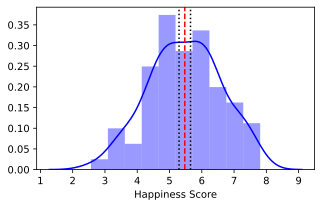

In [237]:
plt.figure(dpi=120,figsize=(5,3))
sns.distplot(new_df_2020['Happiness Score'],color='blue')
plt.axvline(x=ci[0],color = 'black',ls=':')
plt.axvline(x=ci[1],color = 'black',ls=':')
plt.axvline(x=new_df_2020['Happiness Score'].mean(),color='red',ls='--')
plt.show()

Средний показатель счастья колеблется в значениях от 5.3 и 5.7. Оценки счастья распологаются от значения 2.5 до 7.8. С 95%-ной вероятностью действительно вокруг выборочной средней существует определенный доверительный интервал, в который и попадает реально существующая средняя из генеральной совокупности.

In [238]:
import numpy as np
from scipy import stats

ci = st.t.interval(0.95, len(new_df['Happiness Score'])-1, 
              loc=np.mean(new_df['Happiness Score']), 
              scale=st.sem(new_df['Happiness Score']))
print(ci)

(5.360378293628956, 5.511246413897573)


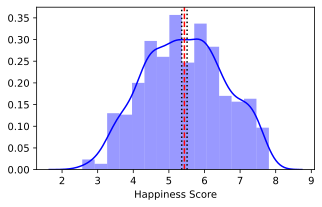

In [239]:
plt.figure(dpi=120,figsize=(5,3))
sns.distplot(new_df['Happiness Score'],color='blue')
plt.axvline(x=ci[0],color = 'black',ls=':')
plt.axvline(x=ci[1],color = 'black',ls=':')
plt.axvline(x=new_df['Happiness Score'].mean(),color='red',ls='--')
plt.show()

Таким образом, доверительные интервалы практически не различаются. В отношении изменения среднего балла счастья во времени мы можем увеличить выборку, либо увеличить расброс значений в метрике до больших размеров.

In [240]:
new_df['Continent'] = gapminder['continent']
new_df

Country  Happiness Rank  Happiness Score  Year  \
152               Afghanistan             153            3.575  2015   
311               Afghanistan             154            3.360  2016   
455               Afghanistan             141            3.794  2017   
614               Afghanistan             145            3.632  2018   
779               Afghanistan             154            3.203  2019   
..                        ...             ...              ...   ...   
148  Central African Republic             149            3.476  2020   
149                    Rwanda             150            3.312  2020   
150                  Zimbabwe             151            3.299  2020   
151               South Sudan             152            2.817  2020   
152               Afghanistan             153            2.567  2020   

          GDP  Life Expectancy  Freedom     Trust Happiness Level Continent  
152  0.319820         0.303350  0.23414  0.097190             low    Europe  
311  0.382270         0.173440  0.16430  0.071120             low  Americas  
455  0.401477         0.180747  0.10618  0.061158             low  Americas  
614  0.332000         0.255000  0.08500  0.036000             low    Africa  
779  0.350000         0.361000  0.00000  0.025000             low    Europe  
..        ...              ...      ...       ...             ...       ...  
148  0.041000         0.000000  0.29300  0.028000             low    Europe  
149  0.343000         0.572000  0.60400  0.486000             low    Europe  
150  0.426000         0.375000  0.37700  0.081000             low    Europe  
151  0.289000         0.209000  0.06600  0.111000             low    Europe  
152  0.301000         0.266000  0.00000  0.001000             low    Europe  

[858 rows x 10 columns]

In [241]:
new_df.groupby('Continent')['Happiness Score'].mean()

Continent
Africa      5.670189
Americas    5.299860
Asia        5.426873
Europe      5.223910
Oceania     5.688136
Name: Happiness Score, dtype: float64

Среднее значение у Африки составляет 5.61, а у Европы 5.2. Таким образом, значения имеют незначительную разницу

In [242]:
new_df.groupby('Continent')['Happiness Score'].var()

Continent
Africa      1.396165
Americas    1.527237
Asia        1.032390
Europe      1.056356
Oceania     0.011104
Name: Happiness Score, dtype: float64

Среднее значение у Африки составляет 1.41, а у Европы 1.07. Таким образом, значения имеют также незначительную разницу

**ОБЩИЙ ВЫВОД**

Таким образом, ВВП играет важнейшую роль в условиях счастья граждан в любой из стран. Данный фактор коррелирую практически с любым другим признаком, описывающим уровень счастья граждан. Уровень счастья - один из важных факторов государства, влияющих на жизнедеятельность людей в целом, например, на популяцию. Всех больше оценок находятся в интерваля от 4.5 до 6., что указывает на преобладающий средний уровень счастья. Средняя оценка находится в интерваля от 5.3 до 5.7, что говорит о достаточно хороших значениях основной части стран. Уровень счастья стран зависит от событий, происхордящих стране, после которых начинает идти положительная или отрицательная тенденция уровня счастья государств. Чем больше данных получаем для анализа, тем более точно можно описать результат.
* Да, отвергаем, ввиду большого разброса оценок
* Для оценки данного фактора можно поместить больше данных для анализа, таких как уровень смертности, уровень дохода населения, уровень загрязненности атмосферы, уровень депопоуляции и уровень образования  и т.д. Данные можно брать из источников данных по странам (Росстат), либо парсить данные из официальных документов государств.
* Детали спецификации регрессии полностью сходятся с корреляционными коэффициентами, список стран в заголовке столбца регрессии также аналогичен нашим данным, рейтинг счастья очень похож на наши данные, как и изменения рейтинга счастья за несколько лет, что передают наши графики.
